In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
cmm_data = pd.read_csv('/home/ruggiec/Downloads/pharmacy_tx.csv')

cmm_data_no_dups = cmm_data.drop_duplicates()

cmm_train, cmm_test = train_test_split(cmm_data, shuffle=True, 
                             random_state= 614, test_size=0.2)

In [3]:
def is_it_generic(text):
    if text.split()[0] == 'generic':
        return 1
    else:
        return 0
    
def drug_name(text):
    return text.split()[1]

def pharm_split(text):
    return int(text.split('#')[1])

In [4]:
cmm_train['tx_date'] = pd.to_datetime(cmm_train.tx_date)
cmm_train['month'] = cmm_train.tx_date.dt.month
cmm_train['day_of_year'] = cmm_train.tx_date.dt.dayofyear

In [5]:
cmm_train['generic'] = cmm_train.drug.apply(is_it_generic)
cmm_train['name'] = cmm_train['drug'].apply(drug_name)
cmm_train['private'] = cmm_train.group.isna().astype(int)
cmm_train['popularity'] = cmm_train.groupby('name')[['tx_date']].transform('count')
cmm_train['rejected'] = cmm_train['rejected'].astype(int)
cmm_train['rejected_count'] = cmm_train.groupby('name')['rejected'].transform('sum')
cmm_train['pharm_num'] = cmm_train.pharmacy.apply(pharm_split)

In [6]:
cmm_train['binpcn'] = cmm_train.bin.astype(str).fillna('') + cmm_train.pcn.fillna('')
cmm_train['bingroup'] = cmm_train.bin.astype(str).fillna('') + cmm_train.group.fillna('')
cmm_train['binpcngroup'] = cmm_train.bin.astype(str).fillna('') + cmm_train.pcn.fillna('') + cmm_train.group.fillna('')

In [7]:
print('There are', cmm_train.binpcngroup.nunique(), 
      'separate insurance plans in the data set.')
print('There are', cmm_train.drug.nunique(), 
      'drugs in the data set.')
print('Leading to', cmm_train.binpcngroup.nunique()*cmm_train.drug.nunique(), 
      'combinations of drug and insurance plan.')

There are 63 separate insurance plans in the data set.
There are 114 drugs in the data set.
Leading to 7182 combinations of drug and insurance plan.


In [8]:
print('There are', cmm_train.drug.nunique(), 
      'drugs in the data set.')

There are 114 drugs in the data set.


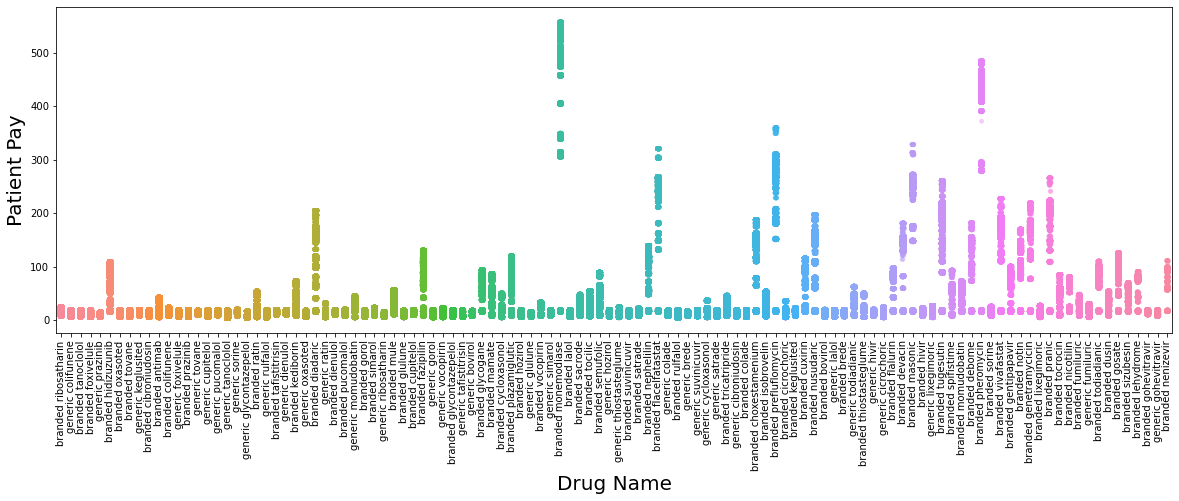

In [9]:
plt.figure(figsize=(20,6))

sns.stripplot(x='drug', y='patient_pay', 
                data=cmm_train[cmm_train.rejected==0], alpha=0.4, color=None)
plt.ylabel('Patient Pay', fontsize=20)

plt.xlabel('Drug Name', fontsize=20)

plt.xticks(rotation=90)
#plt.title('Patient Pay by Drug')
    
plt.show()

In [10]:
cmm_train_nr = cmm_train[cmm_train.rejected==0]

In [12]:
plt.figure(figsize=(8,6))

sns.stripplot(x='name', y='patient_pay', 
                data=cmm_train_nr[cmm_train_nr.name.isin(generics)], alpha=0.3, hue='generic')
plt.ylabel('Patient Pay')
plt.xlabel('Drug')
plt.xticks(rotation=90)
plt.title('Generics')
    
plt.show()

NameError: name 'generic' is not defined

<Figure size 576x432 with 0 Axes>

In [12]:
cmm_train[cmm_train.binpcngroup == 
          cmm_train.binpcngroup.sample(1).values[0]].groupby('drug')['patient_pay'].unique()

drug
branded antimab            [23.54, 21.21, 21.08, 21.81, 42.85, 22.84, 22....
branded bovirol                                                      [13.93]
branded brede                                                        [13.93]
branded choxestamenium     [141.23, 140.43, 141.72, 140.92, 142.69, 141.4...
branded cibroniudosin                                                [13.93]
                                                 ...                        
generic tanoclolol                                                    [6.17]
generic thiostasteglume    [15.44, 16.27, 15.55, 15.63, 15.94, 15.93, 15....
generic todiadianic        [29.63, 28.92, 28.44, 27.87, 28.3, 28.22, 28.8...
generic tovane                                                        [9.38]
generic vocopirin          [12.49, 11.92, 12.28, 13.01, 13.15, 13.63, 14....
Name: patient_pay, Length: 114, dtype: object

In [13]:
cmm_train[cmm_train.binpcngroup == 
          cmm_train.binpcngroup.sample(1).values[0]].groupby('drug')['patient_pay'].std()

drug
branded antimab             2.978081
branded bovirol             0.000000
branded brede               0.000000
branded choxestamenium     69.525248
branded cibroniudosin       0.000000
                             ...    
generic tanoclolol          0.000000
generic thiostasteglume     2.540321
generic todiadianic        18.013338
generic tovane              0.000000
generic vocopirin           1.563969
Name: patient_pay, Length: 114, dtype: float64